# 03. Convolution Neural Networks and Computer Vision with TensorFlow

Going to cover:
* Getting a dataset to work
* Architecture of convolution neural network
* A quick end-to-end example
* Steps in modelling for binary image classification with CNNs
    * Becoming one with the data
    * Preparing data for modelling
    * Creating a CNN model
    * Fitting a model
    * Evaluating a model
    * Improving a model
    * Making a prdiction with trained model
* Steps in modelling for multi-class image clasfication with CNNs
* Same as above (With different dataset)

## Get the data

In [8]:
import os

# pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'data'.
There are 2 directories and 0 images in 'data\test'.
There are 0 directories and 250 images in 'data\test\pizza'.
There are 0 directories and 250 images in 'data\test\steak'.
There are 2 directories and 0 images in 'data\train'.
There are 0 directories and 750 images in 'data\train\pizza'.
There are 0 directories and 750 images in 'data\train\steak'.


In [9]:
# Check the number of images in each directory
for dirpath, dirnames, filenames in os.walk("data"):
    print(f"{dirpath} contains {len(filenames)} images.")

data contains 1 images.
data\test contains 0 images.
data\test\pizza contains 250 images.
data\test\steak contains 250 images.
data\train contains 0 images.
data\train\pizza contains 750 images.
data\train\steak contains 750 images.


In [10]:
# Get the classs names
import pathlib
import numpy as np
data_dir = pathlib.Path("data/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [11]:
# Visualize the data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory
    target_folder = target_dir + target_class

    # Get a random image path
    random_img = random.sample(os.listdir(target_folder), 1)

    # Read the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_img[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

Image shape: (288, 512, 3)


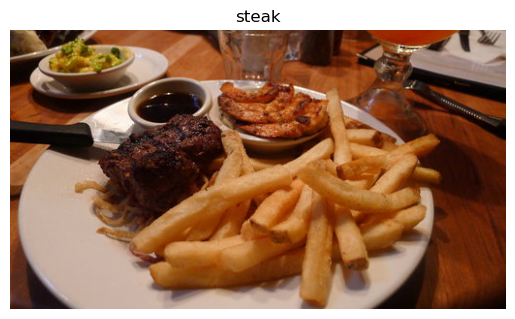

In [12]:
# View a random image from the training dataset
img = view_random_image(target_dir="data/train/", target_class="steak")

In [13]:
# View the img
img

array([[[ 92,  64,  50],
        [ 92,  65,  48],
        [ 98,  70,  49],
        ...,
        [171, 153, 143],
        [164, 145, 138],
        [164, 145, 138]],

       [[ 85,  57,  43],
        [ 80,  53,  36],
        [ 81,  52,  34],
        ...,
        [185, 167, 157],
        [184, 165, 158],
        [178, 159, 152]],

       [[ 74,  48,  33],
        [ 70,  44,  29],
        [ 70,  43,  24],
        ...,
        [190, 172, 162],
        [193, 174, 167],
        [186, 167, 160]],

       ...,

       [[ 73,  32,  14],
        [ 71,  29,  13],
        [ 66,  29,  11],
        ...,
        [  7,   2,   0],
        [  6,   1,   0],
        [  6,   1,   0]],

       [[ 65,  26,   9],
        [ 65,  26,  11],
        [ 64,  27,  11],
        ...,
        [  7,   2,   0],
        [  5,   1,   0],
        [  5,   1,   0]],

       [[ 61,  22,   7],
        [ 63,  23,  11],
        [ 63,  25,  12],
        ...,
        [  7,   3,   2],
        [  6,   2,   1],
        [  6,   2,   1]]

In [14]:
# Check the shape of the image
img.shape

(288, 512, 3)

In [15]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(288, 512, 3), dtype=uint8, numpy=
array([[[ 92,  64,  50],
        [ 92,  65,  48],
        [ 98,  70,  49],
        ...,
        [171, 153, 143],
        [164, 145, 138],
        [164, 145, 138]],

       [[ 85,  57,  43],
        [ 80,  53,  36],
        [ 81,  52,  34],
        ...,
        [185, 167, 157],
        [184, 165, 158],
        [178, 159, 152]],

       [[ 74,  48,  33],
        [ 70,  44,  29],
        [ 70,  43,  24],
        ...,
        [190, 172, 162],
        [193, 174, 167],
        [186, 167, 160]],

       ...,

       [[ 73,  32,  14],
        [ 71,  29,  13],
        [ 66,  29,  11],
        ...,
        [  7,   2,   0],
        [  6,   1,   0],
        [  6,   1,   0]],

       [[ 65,  26,   9],
        [ 65,  26,  11],
        [ 64,  27,  11],
        ...,
        [  7,   2,   0],
        [  5,   1,   0],
        [  5,   1,   0]],

       [[ 61,  22,   7],
        [ 63,  23,  11],
        [ 63,  25,  12],
        ...,
        [  7,   3,   

In [16]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.36078431, 0.25098039, 0.19607843],
        [0.36078431, 0.25490196, 0.18823529],
        [0.38431373, 0.2745098 , 0.19215686],
        ...,
        [0.67058824, 0.6       , 0.56078431],
        [0.64313725, 0.56862745, 0.54117647],
        [0.64313725, 0.56862745, 0.54117647]],

       [[0.33333333, 0.22352941, 0.16862745],
        [0.31372549, 0.20784314, 0.14117647],
        [0.31764706, 0.20392157, 0.13333333],
        ...,
        [0.7254902 , 0.65490196, 0.61568627],
        [0.72156863, 0.64705882, 0.61960784],
        [0.69803922, 0.62352941, 0.59607843]],

       [[0.29019608, 0.18823529, 0.12941176],
        [0.2745098 , 0.17254902, 0.11372549],
        [0.2745098 , 0.16862745, 0.09411765],
        ...,
        [0.74509804, 0.6745098 , 0.63529412],
        [0.75686275, 0.68235294, 0.65490196],
        [0.72941176, 0.65490196, 0.62745098]],

       ...,

       [[0.28627451, 0.1254902 , 0.05490196],
        [0.27843137, 0.11372549, 0.05098039],
        [0.25882353, 0

# A typical architecture of a Convolutional Neural Network

![CNN Architecture](https://miro.medium.com/max/2000/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

Components of a CNN:
| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

# An end-to-end example

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1), and turn it into batches
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

# Setup the train and test directories
train_dir = "data/train/"
test_dir = "data/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32,
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                                target_size=(224, 224),
                                                class_mode="binary",
                                                batch_size=32,
                                                seed=42)

# Create a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                         validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 11s 135ms/step - loss: 0.6221 - accuracy: 0.6627 - val_loss: 0.4410 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 5s 107ms/step - loss: 0.4820 - accuracy: 0.7767 - val_loss: 0.4663 - val_accuracy: 0.7820
Epoch 3/5
47/47 [==============================] - 5s 106ms/step - loss: 0.4586 - accuracy: 0.7880 - val_loss: 0.4059 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 5s 109ms/step - loss: 0.4131 - accuracy: 0.8187 - val_loss: 0.3583 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 5s 106ms/step - loss: 0.3901 - accuracy: 0.8320 - val_loss: 0.3625 - val_accuracy: 0.8480


In [18]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

# Use the same model as before

Can be change two things:
1. The data
2. The input shape

In [19]:
# Set random seeds
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Hub model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                         validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 110ms/step - loss: 0.7277 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 105ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 105ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 105ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 106ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [20]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 4)                 602116    
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 602,123
Trainable params: 602,123
Non-trainable params: 0
_________________________________________________________________


### Improve the model_2

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model 2)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                         validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 109ms/step - loss: 5.3671 - accuracy: 0.6000 - val_loss: 1.9247 - val_accuracy: 0.6720
Epoch 2/5
47/47 [==============================] - 5s 105ms/step - loss: 1.2432 - accuracy: 0.7093 - val_loss: 0.7883 - val_accuracy: 0.6880
Epoch 3/5
47/47 [==============================] - 5s 104ms/step - loss: 0.7516 - accuracy: 0.7353 - val_loss: 0.5402 - val_accuracy: 0.7700
Epoch 4/5
47/47 [==============================] - 5s 104ms/step - loss: 1.1681 - accuracy: 0.7160 - val_loss: 1.3160 - val_accuracy: 0.6500
Epoch 5/5
47/47 [==============================] - 5s 104ms/step - loss: 0.9118 - accuracy: 0.7413 - val_loss: 1.8913 - val_accuracy: 0.5720


In [22]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_6 (Dense)             (None, 100)               15052900  
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


# Binary classification

1. Visualize the data
2. Preprocess the data
3. Create the model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until satisfied


## 1. Visualize the data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


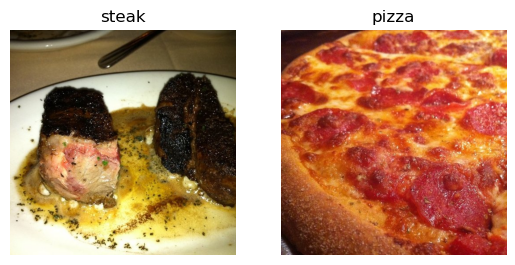

In [23]:
# Visualize the data
plt.figure()
plt.subplot(1,2, 1)
steak_img = view_random_image("data/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("data/train/", "pizza")

## 2. Preprocess the data

In [24]:
# Define the directory datasets paths
train_dir = "data/train/"
test_dir = "data/test/"

In [25]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [26]:
# Load data in batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Wonderful! Looks like our training dataset has 1500 images belonging to 2 classes (pizza and steak) and our test dataset has 500 images also belonging to 2 classes.

Some things to here:
* Due to how our directories are structured, the classes get inferred by the subdirectory names in `train_dir` and `test_dir`.
* The `target_size` parameter defines the input size of our images in `(height, width)` format.
* The `class_mode` value of `'binary'` defines our classification problem type. If we had more than two classes, we would use `'categorical'`.
* The `batch_size` defines how many images will be in each batch, we've used 32 which is the same as the default.

We can take a look at our batched images and labels by inspecting the `train_data` object.

In [27]:
# Get sample of the training data
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [28]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [29]:
# View the labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

# 3. Create the model

In [30]:
# Make the creating of the model little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [31]:
# Create the model 
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

```
Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output
```

Let's discuss some of the components of the `Conv2D` layer:

* The "`2D`" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
* `filters` - these are the number of "feature extractors" that will be moving over our images.
* `kernel_size` - the size of our filters, for example, a `kernel_size` of `(3, 3)` (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
* `stride` - the number of pixels a `filter` will move across as it covers the image. A `stride` of 1 means the filter moves across each pixel 1 by 1. A `stride` of 2 means it moves 2 pixels at a time.
* `padding` - this can be either `'same'` or `'valid'`, `'same'` adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as `'valid'` (default) cuts off excess pixels where the `filter` doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

What's a "feature"?

A **feature** can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these **features** are not defined by us, instead, the model learns them as it applies different filters across the image.

> 📖 **Resources:** For a great demonstration of these in action, be sure to spend some time going through the following:
  * [CNN Explainer Webpage](https://poloclub.github.io/cnn-explainer/) - a great visual overview of many of the concepts we're replicating here with code.
  * [A guide to convolutional arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf) - a phenomenal introduction to the math going on behind the scenes of a convolutional neural network.
  * For a great explanation of padding, see this [Stack Overflow answer](https://stackoverflow.com/a/39371113/7900723).

In [32]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

## 4. Fit the model

* `steps_per_epoch` - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of `train_data` (1500 images in batches of 32 = 1500/32 = ~47 steps)
* `validation_steps` - same as above, except for the `validation_data` parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [33]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 7s 124ms/step - loss: 1.3031 - accuracy: 0.6893 - val_loss: 0.4026 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 5s 106ms/step - loss: 0.4273 - accuracy: 0.8173 - val_loss: 0.3842 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 5s 106ms/step - loss: 0.2748 - accuracy: 0.8940 - val_loss: 0.4974 - val_accuracy: 0.7600
Epoch 4/5
47/47 [==============================] - 5s 106ms/step - loss: 0.1937 - accuracy: 0.9387 - val_loss: 0.4507 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 5s 105ms/step - loss: 0.0886 - accuracy: 0.9740 - val_loss: 0.5593 - val_accuracy: 0.7900


## 5. Evaluate the model

<Axes: >

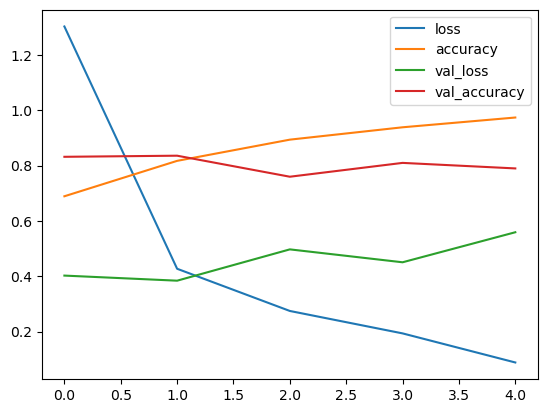

In [34]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot()

In [37]:
# Plot the validation and training data separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

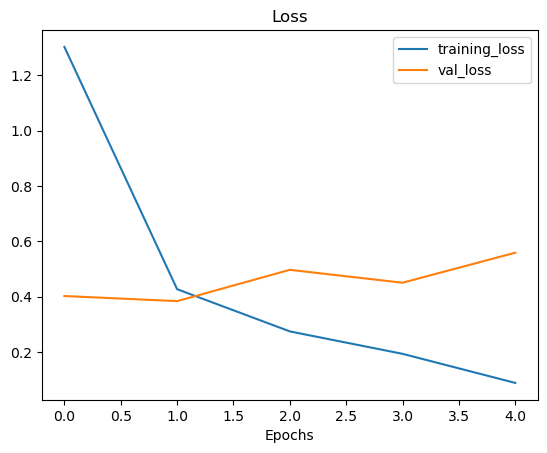

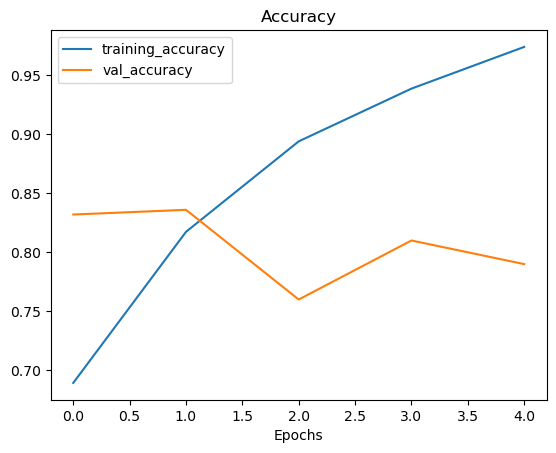

In [38]:
# Check the loss curves
plot_loss_curves(history_4)

## 

1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Stopping overfitting:
* Increase the number of convolutional layers.
* Increase the number of filters.
* Add another dense layer to the output of flattened layer.

In [40]:
# Create the model
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2), # Reduce the number of features by half
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [41]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [42]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 7s 121ms/step - loss: 0.5982 - accuracy: 0.6827 - val_loss: 0.4399 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4468 - accuracy: 0.7953 - val_loss: 0.3965 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 5s 107ms/step - loss: 0.4418 - accuracy: 0.7947 - val_loss: 0.3593 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 5s 109ms/step - loss: 0.4110 - accuracy: 0.8113 - val_loss: 0.3493 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3844 - accuracy: 0.8327 - val_loss: 0.3293 - val_accuracy: 0.8800


In [43]:
# Check the model summary
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

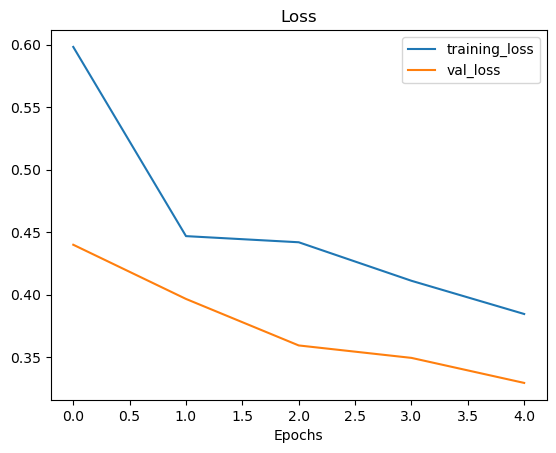

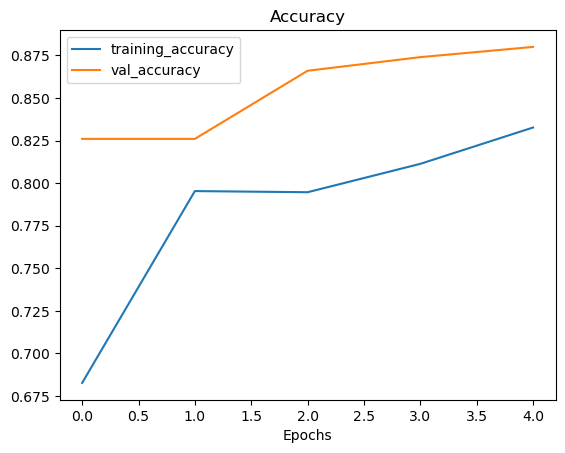

In [44]:
# Plot the loss curves
plot_loss_curves(history_5)